[INIT] MMG: 138517 samples @ 1024.0 Hz


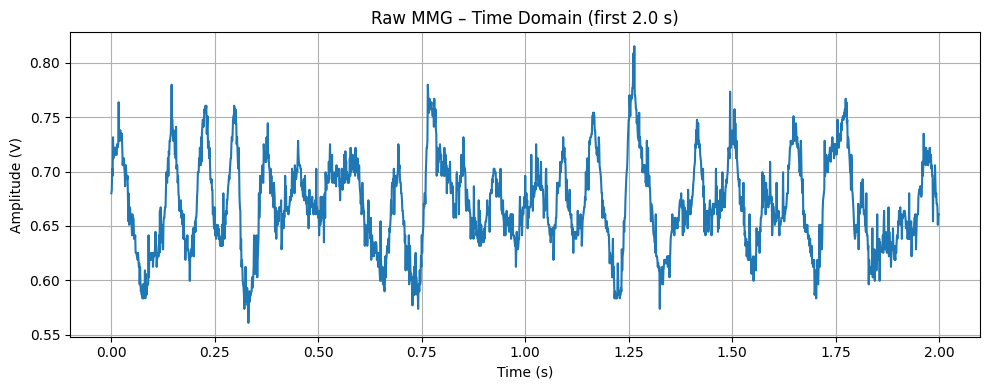

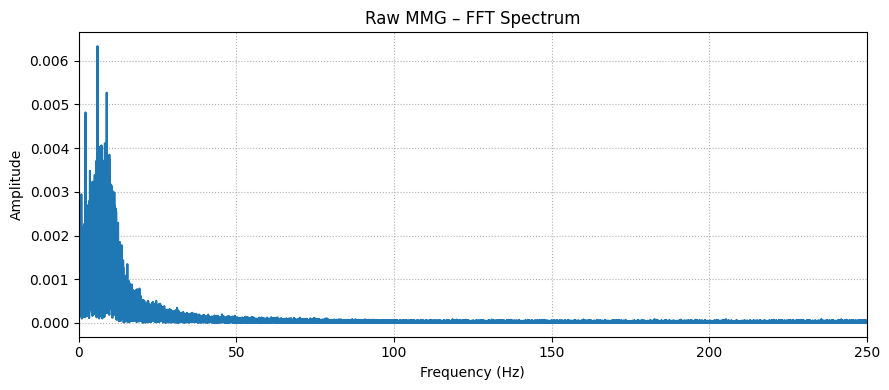

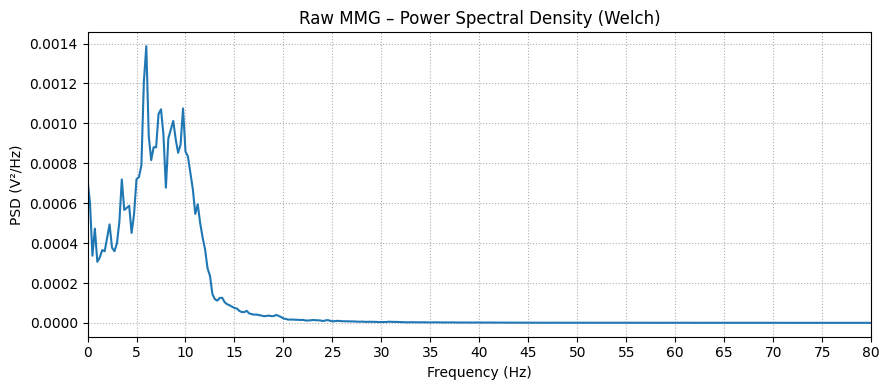

[FILTER] HP(3.0 Hz, ord 2) + LP(60.0 Hz, ord 4) (butter)


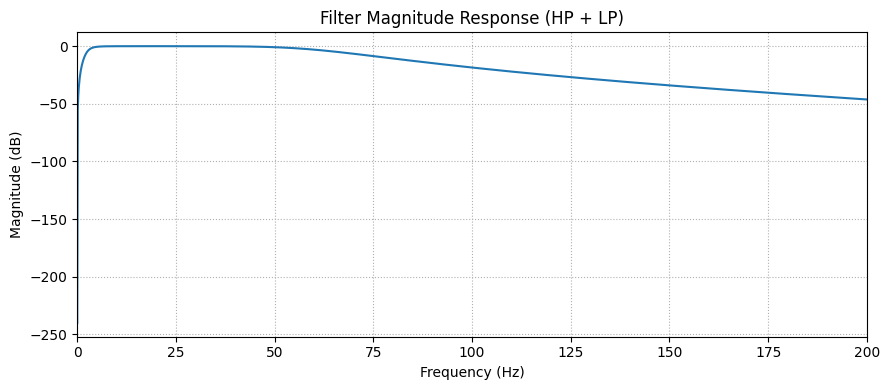

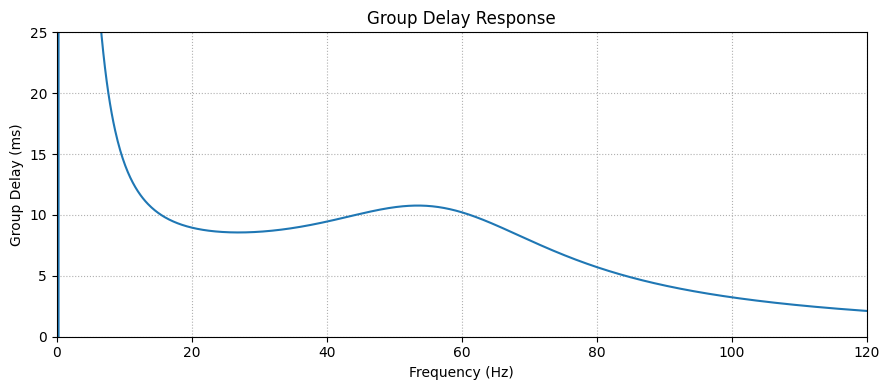

[FILTER] Applied HP+LP chain to 138517 samples.


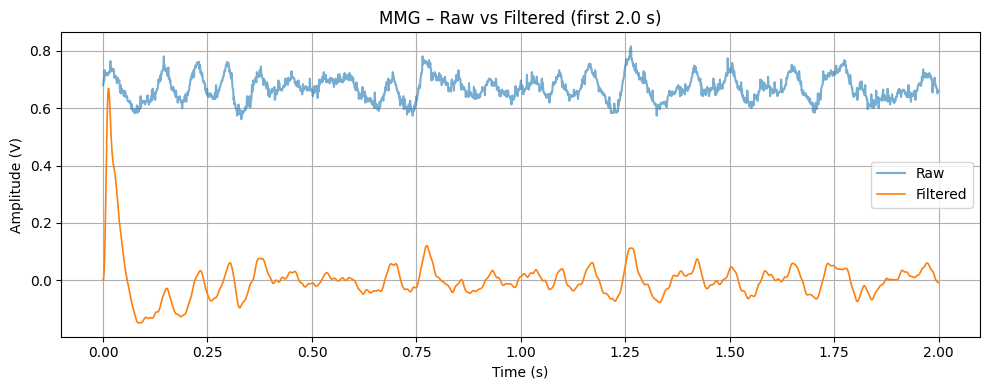

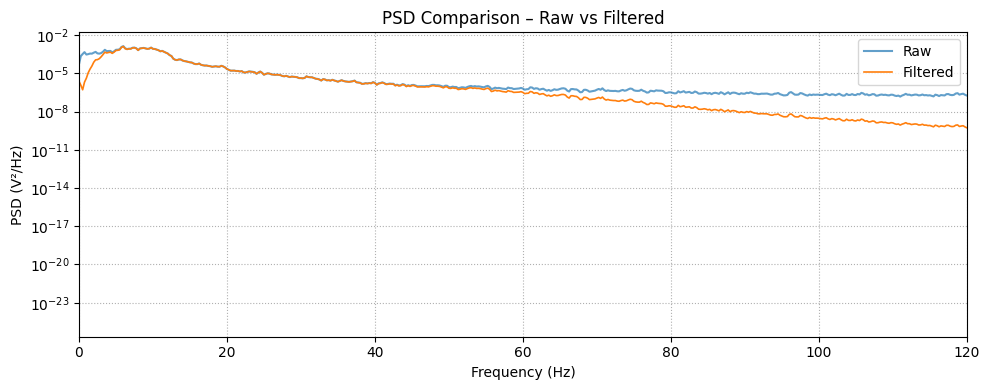

[RESULTS]
  Group delay (avg 5–60 Hz): 10.97 ms
  Empirical latency: 0.98 ms
  ΔSNR improvement: 3.49 dB


In [1]:
import numpy as np
from MMGFilterAnalyzer import MMGFilterAnalyzer

data = np.loadtxt("ADC_SUB1_STAGE2.csv", delimiter=",")
mmg = data[:, 1]   # column 2 is MMG
fs = 1024.0

analyzer = MMGFilterAnalyzer(mmg, fs)
analyzer.plot_raw_time_domain(duration=2)
analyzer.plot_raw_fft(max_hz=250)
analyzer.plot_raw_psd(max_hz=80)                # Welch PSD of raw
analyzer.design_filter(hp_cut=3, lp_cut=60)     # manual IIR design
analyzer.plot_filter_response()
analyzer.apply_filter()
analyzer.compare_filtered_vs_raw(duration=2, max_hz=120)
analyzer.compute_latency_and_snr(sig_band=(5,60))

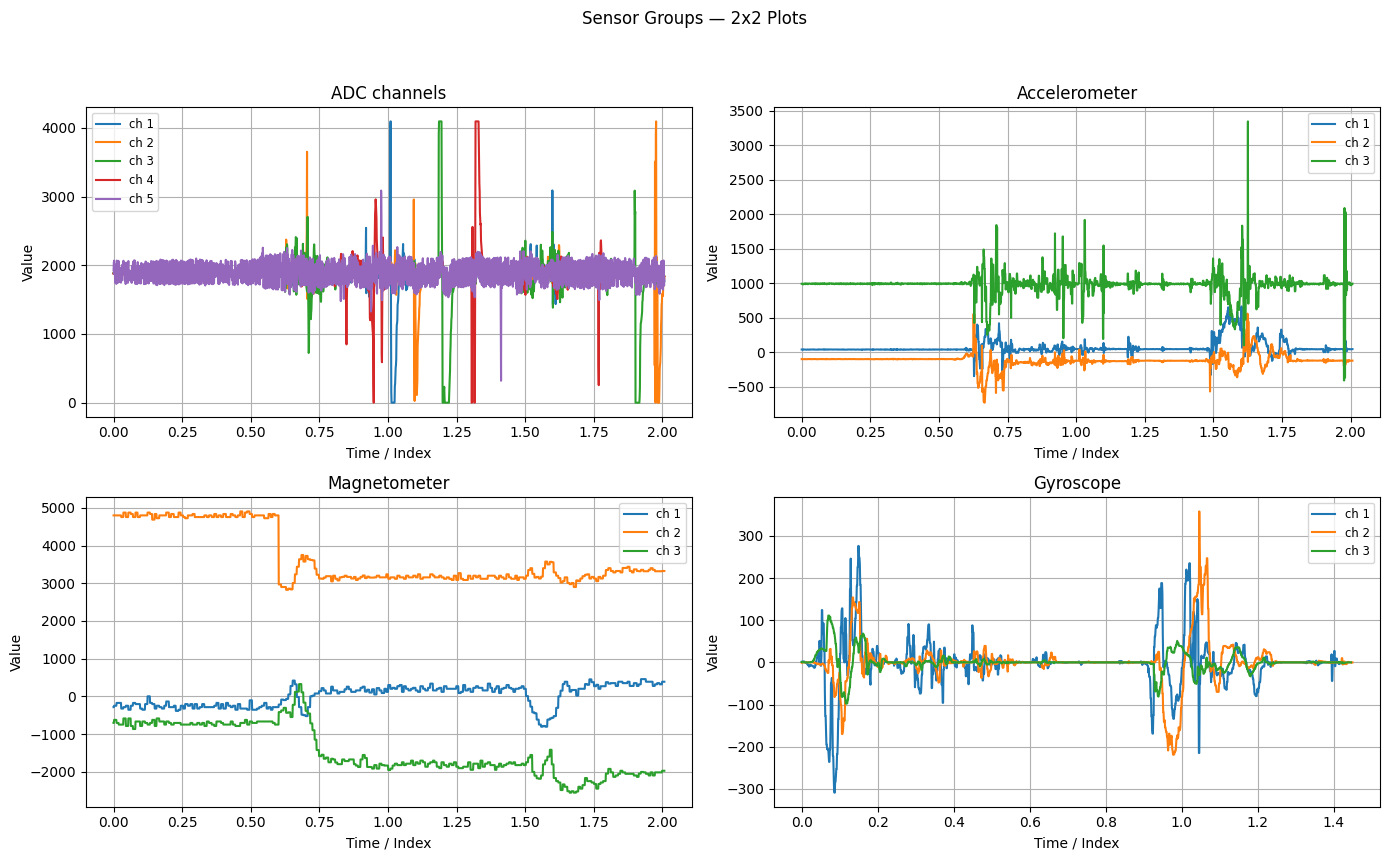

In [22]:
# ...existing code...
import pandas as pd
import matplotlib.pyplot as plt
import os

# file lists (adjust as needed)
adc_files = ["saved_data/test_2.csv",
             "saved_data/test_3.csv",
             "saved_data/test_4.csv",
             "saved_data/test_5.csv",
             "saved_data/test_6.csv"]

acc_files = ["saved_data/test_9.csv",
             "saved_data/test_10.csv",
             "saved_data/test_11.csv"]

gyro_files = ["saved_data/test_12.csv",
             "saved_data/test_13.csv",
             "saved_data/test_14.csv"]

mag_files = ["saved_data/test_15.csv",
              "saved_data/test_16.csv",
              "saved_data/test_17.csv"]

# helper to safely load existing files
def load_dfs(file_list):
    dfs = []
    for f in file_list:
        if os.path.exists(f):
            try:
                dfs.append(pd.read_csv(f))
            except Exception:
                dfs.append(None)
        else:
            dfs.append(None)
    return dfs

adc_dfs = load_dfs(adc_files)
acc_dfs = load_dfs(acc_files)
mag_dfs = load_dfs(mag_files)
gyro_dfs = load_dfs(gyro_files)

fig, axes = plt.subplots(2, 2, figsize=(14, 9))
axes = axes.flatten()

groups = [
    (adc_dfs, "ADC channels"),
    (acc_dfs, "Accelerometer"),
    (mag_dfs, "Magnetometer"),
    (gyro_dfs, "Gyroscope"),
]

for ax, (dfs, title) in zip(axes, groups):
    ax.clear()
    plotted = False
    for i, df in enumerate(dfs):
        if df is None:
            continue
        numeric_cols = df.select_dtypes(include='number').columns
        if len(numeric_cols) >= 2:
            x = df[numeric_cols[0]]
            y = df[numeric_cols[1]]
            ax.plot(x, y, label=f"ch {i+1}")
            plotted = True
        elif len(numeric_cols) == 1:
            y = df[numeric_cols[0]]
            ax.plot(y, label=f"ch {i+1}")
            plotted = True
    ax.set_title(title)
    ax.grid(True)
    if plotted:
        ax.legend(fontsize="small", loc="best")
    ax.set_xlabel("Time / Index")
    ax.set_ylabel("Value")

plt.suptitle("Sensor Groups — 2x2 Plots")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()